In [3]:
%load text_N1_einf.md

## using the Jupyter-Notebook:

### [Keyboard Shortcuts](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Custom%20Keyboard%20Shortcuts.html)

| Command | Action |
| --- | --- |
|Ctrl + Enter | run selected cells |
|Alt + Enter | run the current cell, insert below |
|Shift + Enter | run the current cell, select below |
|Ctrl + S | save and checkpoint |

### [Magic-Commands and othes](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

| Command | Action |
| --- | --- |
| %load python_file.py| load code from python_file.py into Cell |
| %run python_file.py| run python_file.py |
| %time | times how long a cell needs to finish |
| %ls | shows file in the current directory |
| %pwd | shows path of the current directory |

Want more? Here are [28 Tips, Tricks and Shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/).

In [1]:
# import all the packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Show visualisation is inside the notebook
%matplotlib inline 

In [2]:
%pwd

'C:\\Users\\alexa\\Google Drive\\Referenzen\\Uni-Jena\\2019-24_Data-Science_Seminar'

### Working with the price dataset

In [3]:
# create Dataframe from CSV
# use utf-8
df_price = pd.read_csv("./FlourishOA_Data/api_price11-13-17.csv",  encoding="ISO-8859-1", sep=',', decimal='.')
# we can read json, excel, sql, and more ... https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [4]:
# view first lines of dataset
df_price.head()
# df.tail() for last lines and df for (reduced) view of the whole Dataframe 

,id,price,date_stamp,journal_id,influence_id,url,license
0,8691,1400.0,2016-08-11,2051-5960,NaN,NaN,NaN
1,8692,2175.0,2016-08-11,1758-9193,NaN,NaN,NaN
2,8693,2145.0,2016-08-11,1476-0711,NaN,NaN,NaN
3,8694,2145.0,2016-08-11,2047-2994,NaN,NaN,NaN
4,8695,2145.0,2016-08-11,1744-9081,NaN,NaN,NaN


In [5]:
# get basic information about datatypes, entries and columns
df_price.info()
# more infos about datatypes in pandas: https://pbpython.com/pandas_dtypes.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 7 columns):
id              7795 non-null int64
price           7795 non-null float64
date_stamp      7795 non-null object
journal_id      7795 non-null object
influence_id    759 non-null float64
url             364 non-null object
license         378 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 426.4+ KB


In [6]:
# lets change this!
df_price["date_stamp"] = pd.to_datetime(df_price['date_stamp'])

In [7]:
# lets have a look again
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7795 entries, 0 to 7794
Data columns (total 7 columns):
id              7795 non-null int64
price           7795 non-null float64
date_stamp      7795 non-null datetime64[ns]
journal_id      7795 non-null object
influence_id    759 non-null float64
url             364 non-null object
license         378 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 426.4+ KB


In [8]:
# is column `id` really a unique identifier?
unique_id = df_price["id"].nunique()
count_id = df_price["id"].count()
ununique_count = count_id - unique_id
ununique_count

0

### Working with the journal dataset

In [9]:
# create Dataframe from CSV
df_journal = pd.read_csv("./FlourishOA_Data/api_journal11-13-17.csv",  encoding="ISO-8859-1", sep=',', decimal='.')
# we can read json, excel, sql, and more ... https://pandas.pydata.org/pandas-docs/stable/reference/io.html

In [10]:
# view first 10 lines of dataset
df_journal.head(10)

,issn,journal_name,pub_name,is_hybrid,category,url
0,0001-527X,Acta Biochimica Polonica,ACTA BIOCHIMICA POLONICA,0,MOLECULAR AND CELL BIOLOGY,NaN
1,0002-0397,Africa Spectrum,NaN,0,NaN,NaN
2,0003-0090,Bulletin of the American Museum of Natural His...,AMER MUSEUM NATURAL HISTORY,0,ECOLOGY AND EVOLUTION,NaN
3,0003-5521,L'anthropologie,Elsevier,1,Anthropology,NaN
4,0004-1254,Arhiv Za Higijenu Rada I Toksikologiju-Archive...,NaN,0,NaN,NaN
5,0004-282X,Arquivos De Neuro-Psiquiatria,NaN,0,NaN,NaN
6,0005-1098,Automatica,Elsevier,0,ROBOTICS,NaN
7,0007-215X,Brodogradnja,NaN,0,NaN,NaN
8,0008-0845,California Agriculture,NaN,0,NaN,NaN
9,0008-6223,Carbon,Elsevier,1,Physics and Chemistry,NaN


In [11]:
# get basic information about datatypes, entries and columns
df_journal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 6 columns):
issn            13149 non-null object
journal_name    13149 non-null object
pub_name        11679 non-null object
is_hybrid       13149 non-null int64
category        6818 non-null object
url             6361 non-null object
dtypes: int64(1), object(5)
memory usage: 616.4+ KB


In [12]:
# are there only 0 and 1 in `is_hybrid`?
df_journal.groupby("is_hybrid").count()

,issn,journal_name,pub_name,category,url
is_hybrid,,,,,
0,11414,11414,9944,6736,6359
1,1735,1735,1735,82,2


In [13]:
# change data-type for is_hybrid
df_journal["is_hybrid"] = df_journal["is_hybrid"].astype(bool)

In [14]:
# lets have a look again
df_journal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 6 columns):
issn            13149 non-null object
journal_name    13149 non-null object
pub_name        11679 non-null object
is_hybrid       13149 non-null bool
category        6818 non-null object
url             6361 non-null object
dtypes: bool(1), object(5)
memory usage: 526.6+ KB


In [15]:
# look at the different categories
df_journal.groupby("category", sort=True).count()

,issn,journal_name,pub_name,is_hybrid,url
category,,,,,
ANTHROPOLOGY,1,1,1,1,0
Agriculture,291,291,291,291,277
Agriculture | Geography. Anthropology. Recreation,2,2,2,2,2
Agriculture | Medicine,1,1,1,1,1
Agriculture | Science,7,7,7,7,6
Agriculture | Technology,3,3,3,3,2
Agriculture | Technology | Science,1,1,1,1,1
Anthropology,1,1,1,1,0
Architecture,1,1,1,1,1


In [16]:
# change all categorys to uppercase
category_series = df_journal["category"]
df_journal["category"] = df_journal["category"].map(lambda x: x if x is np.nan else x.upper() )

In [17]:
# look at the different categories again
df_journal.groupby("category", sort=True).count()


,issn,journal_name,pub_name,is_hybrid,url
category,,,,,
AGRICULTURE,291,291,291,291,277
AGRICULTURE | GEOGRAPHY. ANTHROPOLOGY. RECREATION,2,2,2,2,2
AGRICULTURE | MEDICINE,1,1,1,1,1
AGRICULTURE | SCIENCE,7,7,7,7,6
AGRICULTURE | TECHNOLOGY,3,3,3,3,2
AGRICULTURE | TECHNOLOGY | SCIENCE,1,1,1,1,1
ANTHROPOLOGY,2,2,2,2,0
ARCHITECTURE,1,1,1,1,1
ARTS & HUMANITIES,1,1,1,1,1


In [18]:
# lets have a look at one specific category "AGRICULTURE" 
category_series_filter = df_journal[df_journal["category"].notnull()]["category"].map(lambda x: "AGRICULTURE" in x)
category_series_filter
df_journal[df_journal["category"].notnull()][category_series_filter]
df_journal[df_journal["category"].notnull()][category_series_filter].groupby("category").count()

,issn,journal_name,pub_name,is_hybrid,url
category,,,,,
AGRICULTURE,291,291,291,291,277
AGRICULTURE | GEOGRAPHY. ANTHROPOLOGY. RECREATION,2,2,2,2,2
AGRICULTURE | MEDICINE,1,1,1,1,1
AGRICULTURE | SCIENCE,7,7,7,7,6
AGRICULTURE | TECHNOLOGY,3,3,3,3,2
AGRICULTURE | TECHNOLOGY | SCIENCE,1,1,1,1,1


In [22]:
# different seperator in mulitcategories. Lets find them
category_series_filter = df_journal[df_journal["category"].notnull()]["category"].map(lambda x: "." in x)
df_journal[df_journal["category"].notnull()][category_series_filter]
df_journal[df_journal["category"].notnull()][category_series_filter].groupby("category").count()

,issn,journal_name,pub_name,is_hybrid,url
category,,,,,


In [20]:
# replace "." with " |"
df_journal["category"] = df_journal["category"].map(lambda x: x if x is np.nan else x.replace(".", " |"))


In [21]:
# look at Results with specific category "PHILOSOPHY"
category_series_filter = df_journal[df_journal["category"].notnull()]["category"].str.contains("PHILOSOPHY") #df[df["category"].notnull()]["category"].str.contains()

df_journal[df_journal["category"].notnull()][category_series_filter]
df_journal[df_journal["category"].notnull()][category_series_filter].groupby("category").count()


,issn,journal_name,pub_name,is_hybrid,url
category,,,,,
EDUCATION | PHILOSOPHY | PSYCHOLOGY | RELIGION,1,1,1,1,1
HISTORY AND PHILOSOPHY OF SCIENCE,2,2,2,2,0
MEDICINE | PHILOSOPHY | PSYCHOLOGY | RELIGION,2,2,2,2,2
PHILOSOPHY | PSYCHOLOGY | RELIGION,277,277,277,277,274
PHILOSOPHY | PSYCHOLOGY | RELIGION | SCIENCE,1,1,1,1,1
PHILOSOPHY | PSYCHOLOGY | RELIGION | SOCIAL SCIENCES,1,1,1,1,1
TECHNOLOGY | PHILOSOPHY | PSYCHOLOGY | RELIGION,1,1,1,1,1


In [23]:
# lets get a list of all Categories

# 1. split categories
def category_string_to_list(category_string):
    category_list = [x.strip() for x in str(category_string).split('|')]
    return category_list

category_list_series = df_journal["category"].map(category_string_to_list)
category_list_series

0        [MOLECULAR AND CELL BIOLOGY]
1                               [nan]
2             [ECOLOGY AND EVOLUTION]
3                      [ANTHROPOLOGY]
4                               [nan]
5                               [nan]
6                          [ROBOTICS]
7                               [nan]
8                               [nan]
9             [PHYSICS AND CHEMISTRY]
10                       [PSYCHOLOGY]
11                              [nan]
12                         [MEDICINE]
13                     [NEUROSCIENCE]
14                              [nan]
15                       [VETERINARY]
16            [PHYSICS AND CHEMISTRY]
17                         [MEDICINE]
18                              [nan]
19                         [MEDICINE]
20                              [nan]
21                        [ECONOMICS]
22                              [nan]
23                              [nan]
24                              [LAW]
25                              [nan]
26          

In [24]:
# 2. creating a set of all categorys ant get it length
category_set = set()

category_lists = category_list_series.tolist()
for category_list in category_lists:
    category_set.update(category_list)

print(category_set)
len(category_set)-1

{'DENTISTRY', 'SOCIOLOGY', 'LIBRARY AND INFORMATION SCIENCE', 'NEPHROLOGY', 'RADIOLOGY', 'MILITARY SCIENCE', 'MEDICINE', 'ONCOLOGY', 'GENERAL WORKS', 'NEUROSCIENCE', 'ENVIRONMENTAL HEALTH', 'LAW', 'MARKETING', 'LANGUAGES & LINGUISTICS', 'SCHOLARLY PUBLISHING', 'GEOGRAPHY', 'ORTHOPEDICS', 'STRUCTURAL ENGINEERING', 'WOOD PRODUCTS', 'ROBOTICS', 'NURSING', 'RHEUMATOLOGY', 'SOCIAL SCIENCES', 'OPHTHALMOLOGY', 'PLASTIC SURGERY', 'VETERINARY', 'LINGUISTICS', 'ARCHITECTURE', 'PSYCHOLOGY', 'GEOTECHNOLOGY', 'GASTROENTEROLOGY', 'LITERATURE', 'SCIENCE', 'AUXILIARY SCIENCES OF HISTORY', 'FINE ARTS', 'EDUCATION', 'ANTHROPOLOGY', 'FOOD SCIENCE', 'CIRCUITS', 'RELIGION', 'INFORMATION SCIENCE', 'PSYCHIATRY', 'ENERGY', 'ECOLOGY AND EVOLUTION', 'MOLECULAR AND CELL BIOLOGY', 'ASTRONOMY AND ASTROPHYSICS', 'SPORTS MEDICINE', 'UROLOGY', 'LANGUAGE AND LITERATURE', 'PHILOSOPHY', 'LITERARY STUDIES', 'POLITICAL SCIENCE', 'MATHEMATICS', 'COMPUTER SCIENCE', 'INFORMATICS', 'TECHNOLOGY', 'MUSIC AND BOOKS ON MUSIC', 'G

78

### Merge journal and price Dataframes

In [25]:
df_journal.head()

,issn,journal_name,pub_name,is_hybrid,category,url
0,0001-527X,Acta Biochimica Polonica,ACTA BIOCHIMICA POLONICA,False,MOLECULAR AND CELL BIOLOGY,NaN
1,0002-0397,Africa Spectrum,NaN,False,NaN,NaN
2,0003-0090,Bulletin of the American Museum of Natural His...,AMER MUSEUM NATURAL HISTORY,False,ECOLOGY AND EVOLUTION,NaN
3,0003-5521,L'anthropologie,Elsevier,True,ANTHROPOLOGY,NaN
4,0004-1254,Arhiv Za Higijenu Rada I Toksikologiju-Archive...,NaN,False,NaN,NaN


In [26]:
df_price.head()

,id,price,date_stamp,journal_id,influence_id,url,license
0,8691,1400.0,2016-08-11,2051-5960,NaN,NaN,NaN
1,8692,2175.0,2016-08-11,1758-9193,NaN,NaN,NaN
2,8693,2145.0,2016-08-11,1476-0711,NaN,NaN,NaN
3,8694,2145.0,2016-08-11,2047-2994,NaN,NaN,NaN
4,8695,2145.0,2016-08-11,1744-9081,NaN,NaN,NaN


In [27]:
# get Number of ununique columns for possible merge
def get_ununique_count(df, column):
    return df[column].count() - df[column].nunique()

print(df_price.columns)
for column in df_price.columns:
    print(column, get_ununique_count(df_price, column))

print(df_journal.columns)
for column in df_journal.columns:
    print(column)
    print(get_ununique_count(df_journal, column))


Index(['id', 'price', 'date_stamp', 'journal_id', 'influence_id', 'url',
       'license'],
      dtype='object')
id 0
price 7268
date_stamp 6323
journal_id 2075
influence_id 0
url 62
license 370
Index(['issn', 'journal_name', 'pub_name', 'is_hybrid', 'category', 'url'], dtype='object')
issn
0
journal_name
1568
pub_name
8150
is_hybrid
13147
category
6706
url
34


In [28]:
# merging two dataframes

df_merge = pd.merge(df_journal, df_price, how='inner', left_on='issn', right_on='journal_id',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)[["journal_name", "price", "category", "influence_id"]]

In [29]:
# lets have a look at the merged data
print(df_merge.info())
df_merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7795 entries, 0 to 7794
Data columns (total 4 columns):
journal_name    7795 non-null object
price           7795 non-null float64
category        4671 non-null object
influence_id    759 non-null float64
dtypes: float64(2), object(2)
memory usage: 304.5+ KB
None


,journal_name,price,category,influence_id
0,Acta Biochimica Polonica,0.0,MOLECULAR AND CELL BIOLOGY,4519.0
1,Acta Biochimica Polonica,1200.0,MOLECULAR AND CELL BIOLOGY,5061.0
2,Bulletin of the American Museum of Natural His...,0.0,ECOLOGY AND EVOLUTION,4480.0
3,Bulletin of the American Museum of Natural His...,0.0,ECOLOGY AND EVOLUTION,4689.0
4,L'anthropologie,3000.0,ANTHROPOLOGY,NaN


In [30]:
# get generall informations about the price of articles
df_merge.price.describe()

count    7795.000000
mean     1273.908794
std      1264.786225
min         0.000000
25%         0.000000
50%      1000.000000
75%      2580.000000
max      7590.000000
Name: price, dtype: float64

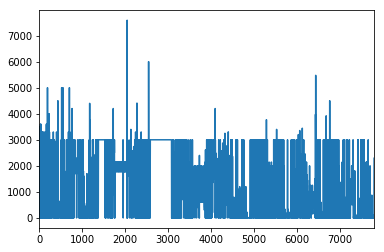

In [31]:
# creat a lineplot
df_merge.price.plot()

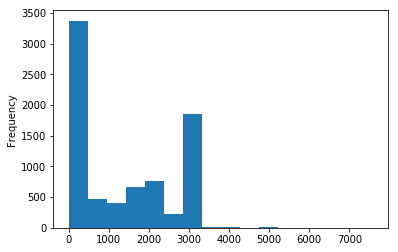

In [32]:
# create a histogramm with 16 bins
df_merge.price.plot.hist(bins=16)

In [33]:
# get all articles with price 0
df_merge[df_merge.price == 0].count()

journal_name    3008
price           3008
category        2414
influence_id     390
dtype: int64

In [34]:
# get grouped information about journals
table = pd.pivot_table(df_merge, values=["price"], index="journal_name", aggfunc={'price': [min, max ,np.sum, len, np.mean]})
table.sort_values(by=("price", "sum"), ascending=False)

price                       \
                                                     len     max         mean   
journal_name                                                                    
Molecular Systems Biology                            5.0  4200.0  3979.200000   
BMC Medicine                                         6.0  2785.0  2534.000000   
Bmc Biology                                          6.0  2785.0  2534.000000   
Biomaterials                                         4.0  3500.0  3500.000000   
Biotechnology for Biofuels                           6.0  2450.0  2287.416667   
Biological Procedures Online                         6.0  2450.0  2214.083333   
Cytokine                                             4.0  3300.0  3300.000000   
Cardiovascular Diabetology                           6.0  2410.0  2167.000000   
Chemosphere                                          4.0  3200.0  3150.000000   
Cell Division                                        6.0  2300.0  2079.333333   
Automatica                                           4.0  3100.0  3100.000000   
Arthritis Research & Therapy                         5.0  2740.0  2445.900000   
Respiratory Research                                 5.0  2525.0  2444.000000   
Biology Direct                                       6.0  2145.0  2019.333333   
Bmc Genetics                                         6.0  2145.0  2010.166667   
Bmc Microbiology                                     6.0  2145.0  2010.166667   
Bmc Genomics                                         6.0  2145.0  2010.166667   
Bmc Health Services Research                         6.0  2145.0  2010.166667   
Bmc Immunology                                       6.0  2145.0  2010.166667   
Bmc Molecular Biology                                6.0  2145.0  2010.166667   
Bmc Musculoskeletal Disorders                        6.0  2145.0  2010.166667   
Bmc Neuroscience                                     6.0  2145.0  2010.166667   
Bmc Infectious Diseases                              6.0  2145.0  2010.166667   
BMC Ophthalmology                                    6.0  2145.0  2010.166667   
BMC Systems Biology                                  6.0  2145.0  2010.166667   
BMC Psychiatry                                       6.0  2145.0  2010.166667   
BMC Pediatrics                                       6.0  2145.0  2010.166667   
Bmc Public Health                                    6.0  2145.0  2010.166667   
BMC Neurology                                        6.0  2145.0  2010.166667   
BMC Nephrology                                       6.0  2145.0  2010.166667   
...                                                  ...     ...          ...   
Investigaciones Geograficas                          1.0     0.0     0.000000   
Investigaciones Regionales - Journal of Regiona...   1.0     0.0     0.000000   
Investigación en Enfermería: Imagen Y Desarrollo     1.0     0.0     0.000000   
Iranian Journal of Basic Medical Sciences            1.0     0.0     0.000000   
Iranian Journal of Medical Microbiology              1.0     0.0     0.000000   
Iranian Journal of Medical Sciences                  1.0     0.0     0.000000   
International Journal of Wellbeing                   1.0     0.0     0.000000   
International Journal of Therapeutic Massage & ...   1.0     0.0     0.000000   
International Journal of Telerehabilitation          1.0     0.0     0.000000   
International Journal of Speleology                  2.0     0.0     0.000000   
International Journal of Diabetes in Developing...   1.0     0.0     0.000000   
International Journal of Difference Equations        1.0     0.0     0.000000   
International Journal of Disaster Risk Science       1.0     0.0     0.000000   
International Journal of Education Policy and L...   1.0     0.0     0.000000   
International Journal of Education and the Arts      1.0     0.0     0.000000   
International Journal of Educational Technology...   1.0     0.0     0.000000   
I

In [35]:
# export table to excel-format
table.to_excel("././FlourishOA_Data/journal-price_pivot-table.xlsx")
# want more possibilities to work with excel? https://pbpython.com/improve-pandas-excel-output.html

In [ ]:
# you still want more? Here you go!
# awesome Pandas-Workshop: https://github.com/alanderex/pydata-pandas-workshop
# small Overview of Dataframes and Series (+Methods): https://www.geeksforgeeks.org/python-pandas-dataframe/
# Datasets for different exercises: https://www.dataquest.io/blog/free-datasets-for-projects/ 
# Datasets for cleaning pactices: https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/ 